## Install Library

In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.svm import SVC
import nltk
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import re
from nltk.corpus import stopwords


## Read Data

In [3]:
# Define data path
data_path = "./bbc"

# Load data
folders = os.listdir(data_path)
documents = []

for folder in os.listdir(data_path):
    folder_dir = os.path.join(data_path, folder)
    # Check if it's a directory
    if os.path.isdir(folder_dir):
        for file in os.listdir(folder_dir):
            with open(os.path.join(folder_dir, file), 'r', encoding='latin-1') as f:
                text = f.read()
                documents.append({'before_preprocessing': text, 'category': folder})

            
bbc_data = pd.DataFrame(documents)

In [4]:
bbc_data['length'] = bbc_data['before_preprocessing'].apply(lambda x: len(x))
bbc_data.head()
     

,before_preprocessing,category,length
0,Musicians to tackle US red tape\n\nMusicians' ...,entertainment,2261
1,"U2's desire to be number one\n\nU2, who have w...",entertainment,4810
2,Rocker Doherty in on-stage fight\n\nRock singe...,entertainment,2127
3,Snicket tops US box office chart\n\nThe film a...,entertainment,1046
4,Ocean's Twelve raids box office\n\nOcean's Twe...,entertainment,1586


In [5]:
print("Category of the First Document:", bbc_data.iloc[0]['category'])  # Print the category of the first document
print("Length of the Text:", len(bbc_data.iloc[0]['before_preprocessing']))  # Print the length of the text in the first document
print("Full Text of the First Document:")
print(bbc_data.iloc[0]['before_preprocessing'])  # Print the full text of the first document

Category of the First Document: entertainment
Length of the Text: 2261
Full Text of the First Document:
Musicians to tackle US red tape

Musicians' groups are to tackle US visa regulations which are blamed for hindering British acts' chances of succeeding across the Atlantic.

A singer hoping to perform in the US can expect to pay $1,300 (Â£680) simply for obtaining a visa. Groups including the Musicians' Union are calling for an end to the "raw deal" faced by British performers. US acts are not faced with comparable expense and bureaucracy when visiting the UK for promotional purposes.

Nigel McCune from the Musicians' Union said British musicians are "disadvantaged" compared to their US counterparts. A sponsor has to make a petition on their behalf, which is a form amounting to nearly 30 pages, while musicians face tougher regulations than athletes and journalists. "If you make a mistake on your form, you risk a five-year ban and thus the ability to further your career," says Mr McCu

In [6]:
bbc_data['category'].value_counts()

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

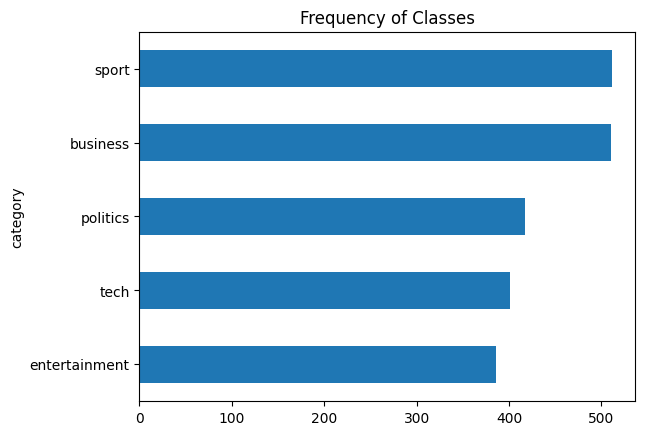

<Figure size 1000x600 with 0 Axes>

In [7]:
bbc_data["category"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.figure(figsize=(10, 6))
plt.show()

### Text Pre-Processing

In [8]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_document(doc):
    doc = doc.lower()
    doc = re.sub(r'\d+', '', doc)
    doc = re.sub(r'[^a-zA-Z\s]', '', doc)
    tokens = word_tokenize(doc)
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    preprocessed_doc = ' '.join(lemmatized)
    return preprocessed_doc


bbc_data['preprocessed'] = bbc_data['before_preprocessing'].apply(preprocess_document)

In [9]:
bbc_data['length_after_cleaning'] = bbc_data['preprocessed'].apply(lambda x: len(x))
bbc_data.head(10)

,before_preprocessing,category,length,preprocessed,length_after_cleaning
0,Musicians to tackle US red tape\n\nMusicians' ...,entertainment,2261,musician tackle u red tape musician group tack...,1461
1,"U2's desire to be number one\n\nU2, who have w...",entertainment,4810,u desire number one u three prestigious grammy...,3027
2,Rocker Doherty in on-stage fight\n\nRock singe...,entertainment,2127,rocker doherty onstage fight rock singer pete ...,1420
3,Snicket tops US box office chart\n\nThe film a...,entertainment,1046,snicket top u box office chart film adaptation...,746
4,Ocean's Twelve raids box office\n\nOcean's Twe...,entertainment,1586,ocean twelve raid box office ocean twelve crim...,1130
5,'Landmark movies' of 2004 hailed\n\nUS film pr...,entertainment,2121,landmark movie hailed u film professional decl...,1538
6,Pete Doherty misses bail deadline\n\nSinger Pe...,entertainment,1481,pete doherty miss bail deadline singer pete do...,1018
7,Fockers retain film chart crown\n\nComedy Meet...,entertainment,1821,fockers retain film chart crown comedy meet fo...,1139
8,Top gig award for Scissor Sisters\n\nNew York ...,entertainment,1238,top gig award scissor sister new york band sci...,854
9,"Johnny Depp: The acting outlaw\n\nJohnny Depp,...",entertainment,3092,johnny depp acting outlaw johnny depp whose la...,2249


In [10]:
print("Category of the First Document:", bbc_data.iloc[0]['category'])  # Print the category of the first document
print("Length of the Text:", len(bbc_data.iloc[0]['preprocessed']))  # Print the length of the text in the first document
print("Full Text of the First Document:")
print(bbc_data.iloc[0]['preprocessed'])  # Print the full text of the first document

Category of the First Document: entertainment
Length of the Text: 1461
Full Text of the First Document:
musician tackle u red tape musician group tackle u visa regulation blamed hindering british act chance succeeding across atlantic singer hoping perform u expect pay simply obtaining visa group including musician union calling end raw deal faced british performer u act faced comparable expense bureaucracy visiting uk promotional purpose nigel mccune musician union said british musician disadvantaged compared u counterpart sponsor make petition behalf form amounting nearly page musician face tougher regulation athlete journalist make mistake form risk fiveyear ban thus ability career say mr mccune u world biggest music market mean something done creaky bureaucracy say mr mccune current situation preventing british act maintaining momentum developing u added musician union stance endorsed music manager forum mmf say british artist face uphill struggle succeed u thanks tough visa require

## Train Test Split

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bbc_data['preprocessed'], bbc_data['category'], test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1557,)
Shape of X_test: (668,)
Shape of y_train: (1557,)
Shape of y_test: (668,)


###  FEATURE EXTRACTION 

In [12]:
# TF- IDF

tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# Bag of Words
count_vectorizer = CountVectorizer()
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)

## Machine Learning

## Random Forest

Random Forest accuracy: 0.9746
               precision    recall  f1-score   support

     business       0.95      0.99      0.97       163
entertainment       0.99      0.96      0.97       120
     politics       0.97      0.96      0.97       112
        sport       1.00      0.99      1.00       148
         tech       0.97      0.96      0.96       125

     accuracy                           0.97       668
    macro avg       0.98      0.97      0.97       668
 weighted avg       0.97      0.97      0.97       668



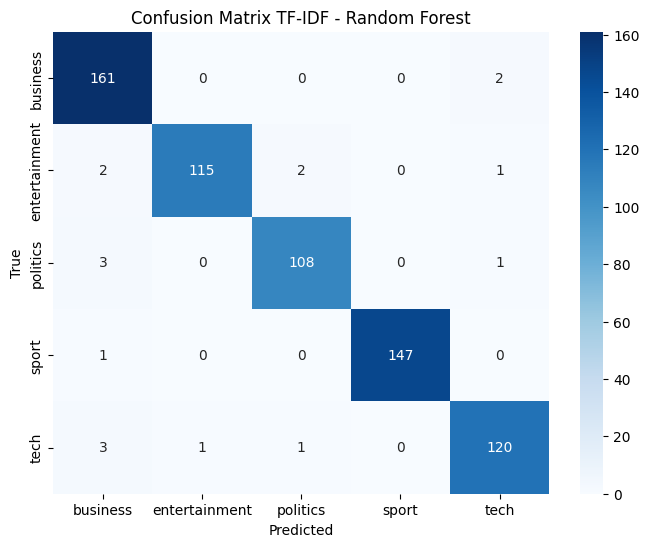

In [14]:
## Random Forest + TF-IDF 

classifier_rf = RandomForestClassifier()


classifier_rf.fit(X_train_tfidf, y_train)
y_pred_rf = classifier_rf.predict(X_test_tfidf)

def evaluate_model(true_labels, predicted_labels, model_name):

    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f"{model_name} accuracy: {accuracy:.4f}")
    print(classification_report(true_labels, predicted_labels))
    cm = confusion_matrix(true_labels, predicted_labels, labels=np.unique(true_labels))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix TF-IDF - {model_name}')
    plt.show()


evaluate_model(y_test, y_pred_rf, "Random Forest")



Random Forest accuracy: 0.9656
               precision    recall  f1-score   support

     business       0.92      0.99      0.95       163
entertainment       0.98      0.95      0.97       120
     politics       0.97      0.97      0.97       112
        sport       0.99      0.99      0.99       148
         tech       0.98      0.91      0.95       125

     accuracy                           0.97       668
    macro avg       0.97      0.96      0.97       668
 weighted avg       0.97      0.97      0.97       668



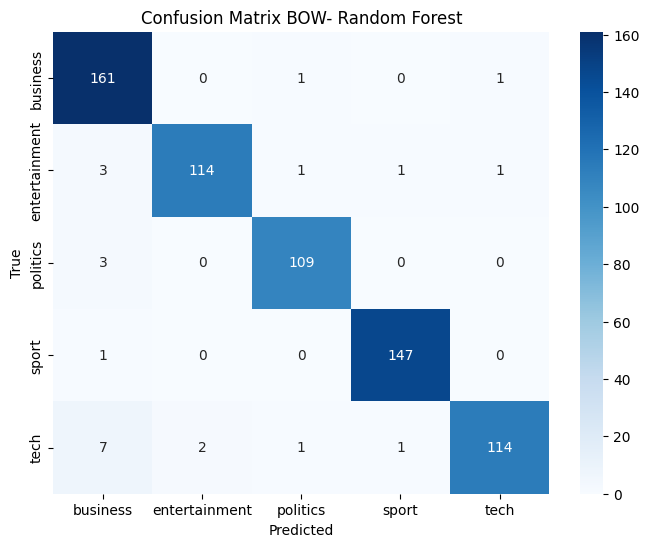

In [15]:
## Random Forest + Bag of Words

classifier_rf = RandomForestClassifier()

# Fit the classifier to the training data
classifier_rf.fit(X_train_bow, y_train)

# Predict labels for the test data
y_pred_rf = classifier_rf.predict(X_test_bow)

# Evaluation function
def evaluate_model(true_labels, predicted_labels, model_name):
    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f"{model_name} accuracy: {accuracy:.4f}")
    print(classification_report(true_labels, predicted_labels))
    cm = confusion_matrix(true_labels, predicted_labels, labels=np.unique(true_labels))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix BOW- {model_name}')
    plt.show()

# Evaluate the Random Forest classifier
evaluate_model(y_test, y_pred_rf, "Random Forest")

## SVM

SVM accuracy: 0.9775
               precision    recall  f1-score   support

     business       0.98      0.98      0.98       163
entertainment       0.96      0.97      0.97       120
     politics       0.96      0.99      0.97       112
        sport       1.00      0.99      1.00       148
         tech       0.99      0.95      0.97       125

     accuracy                           0.98       668
    macro avg       0.98      0.98      0.98       668
 weighted avg       0.98      0.98      0.98       668



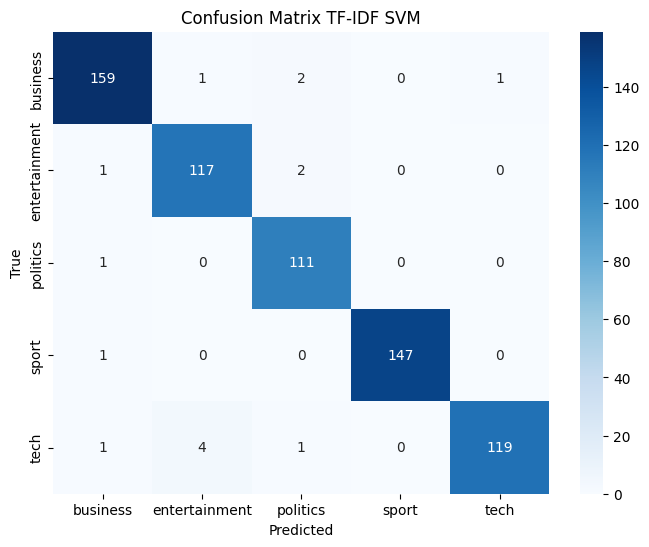

In [17]:
## SVM + TF-IDF 

classifier_svm = SVC()


classifier_svm.fit(X_train_tfidf, y_train)
y_pred_svm = classifier_svm.predict(X_test_tfidf)

def evaluate_model(true_labels, predicted_labels, model_name):

    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f"{model_name} accuracy: {accuracy:.4f}")
    print(classification_report(true_labels, predicted_labels))
    cm = confusion_matrix(true_labels, predicted_labels, labels=np.unique(true_labels))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix TF-IDF {model_name}')
    plt.show()


evaluate_model(y_test, y_pred_svm, "SVM")


SVM accuracy: 0.9626
               precision    recall  f1-score   support

     business       0.97      0.96      0.97       163
entertainment       0.98      0.92      0.95       120
     politics       0.95      0.98      0.96       112
        sport       1.00      0.98      0.99       148
         tech       0.90      0.98      0.94       125

     accuracy                           0.96       668
    macro avg       0.96      0.96      0.96       668
 weighted avg       0.96      0.96      0.96       668



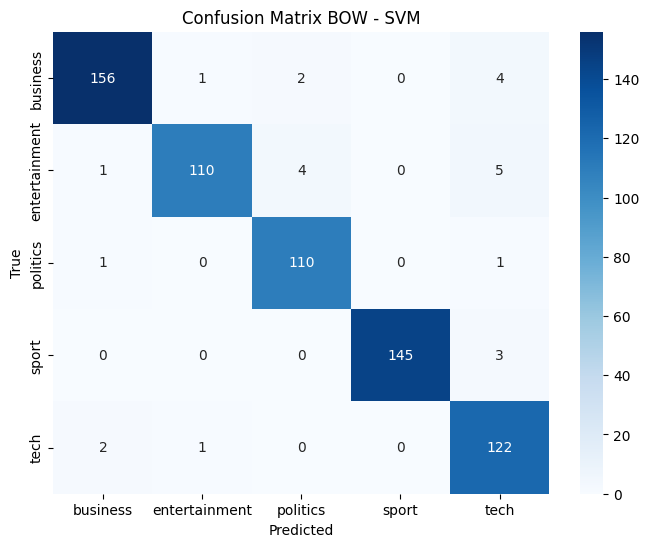

In [18]:
## SVM + Bag of Words


classifier_svm = SVC()


classifier_svm.fit(X_train_bow, y_train)
y_pred_svm = classifier_svm.predict(X_test_bow)

def evaluate_model(true_labels, predicted_labels, model_name):

    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f"{model_name} accuracy: {accuracy:.4f}")
    print(classification_report(true_labels, predicted_labels))
    cm = confusion_matrix(true_labels, predicted_labels, labels=np.unique(true_labels))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix BOW - {model_name}')
    plt.show()


evaluate_model(y_test, y_pred_svm, "SVM")

## Naive Bayes

Naive Bayes accuracy: 0.9671
               precision    recall  f1-score   support

     business       0.96      0.98      0.97       163
entertainment       0.99      0.93      0.96       120
     politics       0.91      0.98      0.94       112
        sport       0.99      0.99      0.99       148
         tech       0.99      0.94      0.96       125

     accuracy                           0.97       668
    macro avg       0.97      0.97      0.97       668
 weighted avg       0.97      0.97      0.97       668



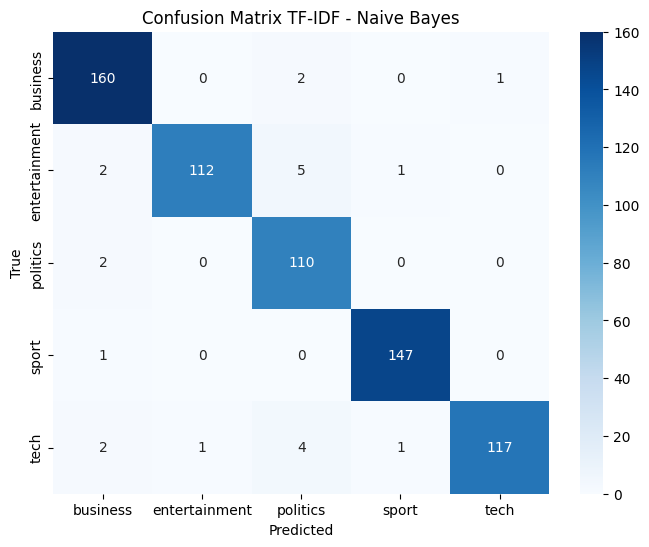

In [19]:
## Naive Bayes + TF-IDF 

classifier_nbs = MultinomialNB()


classifier_nbs.fit(X_train_tfidf, y_train)
y_pred_nbs = classifier_nbs.predict(X_test_tfidf)

def evaluate_model(true_labels, predicted_labels, model_name):

    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f"{model_name} accuracy: {accuracy:.4f}")
    print(classification_report(true_labels, predicted_labels))
    cm = confusion_matrix(true_labels, predicted_labels, labels=np.unique(true_labels))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix TF-IDF - {model_name}')
    plt.show()


evaluate_model(y_test, y_pred_nbs, "Naive Bayes")

Naive Bayes accuracy: 0.9775
               precision    recall  f1-score   support

     business       0.98      0.96      0.97       163
entertainment       0.99      0.97      0.98       120
     politics       0.96      0.98      0.97       112
        sport       1.00      0.99      1.00       148
         tech       0.96      0.98      0.97       125

     accuracy                           0.98       668
    macro avg       0.98      0.98      0.98       668
 weighted avg       0.98      0.98      0.98       668



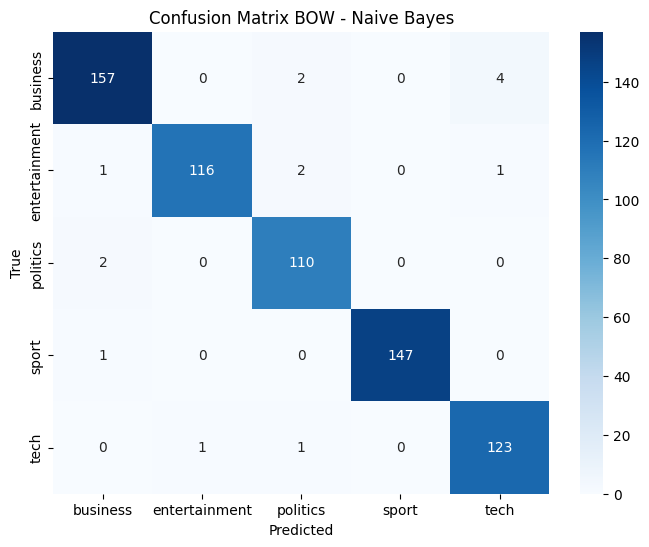

In [20]:
## Naive Bayes + Bag of Words

classifier_nbs = MultinomialNB()


classifier_nbs.fit(X_train_bow, y_train)
y_pred_nbs = classifier_nbs.predict(X_test_bow)


def evaluate_model(true_labels, predicted_labels, model_name):

    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f"{model_name} accuracy: {accuracy:.4f}")
    print(classification_report(true_labels, predicted_labels))
    cm = confusion_matrix(true_labels, predicted_labels, labels=np.unique(true_labels))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix BOW - {model_name}')
    plt.show()


evaluate_model(y_test, y_pred_nbs, "Naive Bayes")

## Reference

# The code used in this document is sourced from Python documentation, as well as lecture modules on image processing for data science.